In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import itertools
import plotly.graph_objects as go
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train_path = '/content/gdrive/MyDrive/trclassifications/train'
val_path = '/content/gdrive/MyDrive/trclassifications/validation'
test_path = '/content/gdrive/MyDrive/trclassifications/validation'

In [6]:
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 5

In [7]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [9]:
print("The number of Classes we have are {} \n and they are : {}".format(NUM_CLASSES, CLASSES))

The number of Classes we have are 5 
 and they are : ['tr3', 'tr4', 'tr1', 'tr5', 'tr2']


In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [11]:
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 195 images belonging to 5 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 128 images belonging to 5 classes.


In [15]:
from keras.applications.vgg16 import VGG16

In [16]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
for layer in vgg.layers:
    layer.trainable = False

In [18]:
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [19]:
model = Model(inputs=vgg.input, outputs=prediction)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
7/7 [==============================] - 245s 34s/step - loss: 2.4232 - accuracy: 0.2564 - val_loss: 1.9885 - val_accuracy: 0.2422
Epoch 2/5
7/7 [==============================] - 178s 29s/step - loss: 1.6000 - accuracy: 0.4051 - val_loss: 1.9181 - val_accuracy: 0.4062
Epoch 3/5
7/7 [==============================] - 178s 27s/step - loss: 1.4170 - accuracy: 0.4974 - val_loss: 1.6585 - val_accuracy: 0.4062
Epoch 4/5
7/7 [==============================] - 178s 27s/step - loss: 1.3831 - accuracy: 0.4718 - val_loss: 1.6457 - val_accuracy: 0.3672
Epoch 5/5
7/7 [==============================] - 158s 24s/step - loss: 1.3882 - accuracy: 0.4718 - val_loss: 1.7349 - val_accuracy: 0.4531


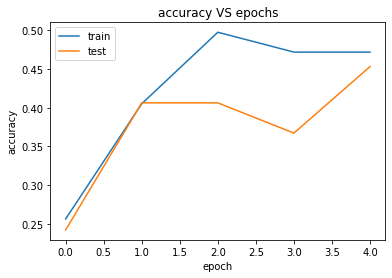

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy VS epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

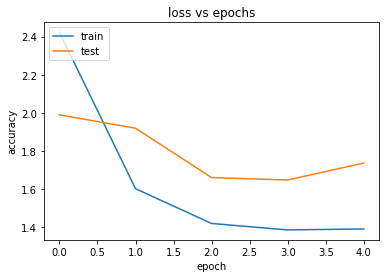

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
import joblib

In [26]:
joblib.dump(model,'vgg_multiclass.pkl')



['vgg_multiclass.pkl']

In [27]:
joblib.dump(model,'vgg_multiclass.h5')

['vgg_multiclass.h5']

In [30]:
model2 = Model(inputs=vgg.input, outputs=prediction)

In [31]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [33]:
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
cb=tf.keras.callbacks.ModelCheckpoint(
    '/content/gdrive/MyDrive',
    monitor='val_loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=True,
    mode='auto',
    save_freq='epoch',
    
    
)

In [45]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=5, verbose=1,
    mode='auto'
)

In [46]:
history = model2.fit(
  training_set,
  validation_data=test_set,
  epochs=12,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[es]
)

Epoch 1/12
7/7 [==============================] - 157s 26s/step - loss: 1.3136 - accuracy: 0.5026 - val_loss: 1.7424 - val_accuracy: 0.4688
Epoch 2/12
7/7 [==============================] - 156s 23s/step - loss: 1.2605 - accuracy: 0.5949 - val_loss: 1.6473 - val_accuracy: 0.5000
Epoch 3/12
7/7 [==============================] - 156s 23s/step - loss: 1.1407 - accuracy: 0.5179 - val_loss: 1.7023 - val_accuracy: 0.4922
Epoch 4/12
7/7 [==============================] - 157s 23s/step - loss: 1.0354 - accuracy: 0.5897 - val_loss: 1.3475 - val_accuracy: 0.5625
Epoch 5/12
7/7 [==============================] - 157s 24s/step - loss: 0.8201 - accuracy: 0.6718 - val_loss: 1.4221 - val_accuracy: 0.4844
Epoch 6/12
7/7 [==============================] - 156s 23s/step - loss: 0.8288 - accuracy: 0.6667 - val_loss: 1.3655 - val_accuracy: 0.5703
Epoch 7/12
7/7 [==============================] - 156s 23s/step - loss: 0.9217 - accuracy: 0.6718 - val_loss: 1.7844 - val_accuracy: 0.4922
Epoch 8/12
7/7 [====

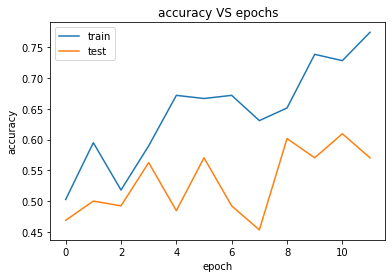

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy VS epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

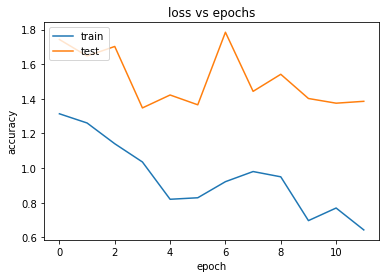

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
joblib.dump(model2,'vgg_multiclass2.h5')

['vgg_multiclass2.h5']